# IDS Assignment Part 2 - <font color="red"><h7>Deadline: 23/01/2023 23:59</h7></font>
This is the second part of the assignment in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing your screenshots for Question 7. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Minh Nghia Phan 394806
    
    2. 
    
    3.

## Question 1: Preprocessing (20 points)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

### Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

RANDOM_SEED = 42069

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [195]:
df = pd.read_csv('datasets/ski_resorts.csv', index_col=0)
df

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,75398.0,600.0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,99017.0,1032.0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,1932.0,0.0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,32938.0,163.0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,49228.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),France,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,NaN,35,7.0,71,96433.0,0.0
373,Sauze d’Oulx (Via Lattea),Italy,2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,29.0,35,7.0,71,96433.0,0.0
374,Gressoney - La-Trinite (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,31984.0,655.0
375,Champoluc (Monterosa Ski),Italy,3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,9.0,9,12.0,30,31984.0,655.0


#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [196]:
# Show column data types
df.dtypes

Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object

In [197]:
# First 5 rows
df.head()

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
1,Alpendorf (Ski amedé),Austria,1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,22.0,16,11.0,49,75398.0,600.0
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,37.0,28,7.0,72,99017.0,1032.0
3,Oberau (Wildschönau),Austria,1130.0,900.0,30.0,1.0,0,1.0,2,No,No,2.0,0,0.0,2,1932.0,0.0
4,Dachstein West,Austria,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,25.0,8,3.0,36,32938.0,163.0
5,Rosa Khutor,Southern Russia,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,6.0,11,10.0,27,49228.0,450.0


**Your Answer:** 
1. The columns **IntermediateSlope** and **TotalSlope** measure the amount of slopes in kilometers and therefore should have types __float64__ instead of __int64__.

2. **Snowparks** and **NightSki** should have __boolean__ type because they only have *Yes* and *No* values.

3. **SurfaceLifts**, **GondolaLifts**, **LiftCapacity**, and **SnowCannons** should have type __int64__ instead of __float64__ because they indicate either number of lifts or number of passengers, which should all be integers.

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [198]:
# Convert to categorical
tocat = ['Country', 'Snowparks', 'NightSki']
for col in tocat:
    df[col] = df[col].astype('category')

In [199]:
# Number of unique resorts
len(df['Resort'].unique())

376

**Your Answer:** **Country** can be categorical, as each country is a category itself.

The other columns, other than **Resort**, **Snowparks** and **NightSki**, can not be categorical, because they represent numerical real values and measure magnitudes (kilometers, prices, number of lifts/passengers).

**Snowparks** and **NightSki** should be boolean instead of categorical, because they have only 2 values "Yes" and "No".

**Resort** represents the unique name of each resort in each row (there are 376 unique resorts corresponding to the exact 376 rows of the dataframe), hence it should not be categorical.

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [200]:
# your code for 1. How many entries does the dataframe have? (To relate this to the number of entries missing)
n_entries = len(df.columns)*len(df.index)
print(f"Number of entries in the dataframe: {n_entries}")

Number of entries in the dataframe: 6392


In [201]:
# your code for 2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
n_missing = df.isnull().sum().sum()
print(f"Number of missing values in the dataframe: {n_missing}")
print(f"Ratio of missing values: {n_missing/n_entries}")

Number of missing values in the dataframe: 87
Ratio of missing values: 0.013610763454317897


In [202]:
# your code for 3. How many rows have at least a single missing value?
df_rows_na = df[df.isna().any(axis=1)] # DF of rows with at least 1 NaN value
print(f"Number of rows with at least 1 missing value: {len(df_rows_na)}")

Number of rows with at least 1 missing value: 45


In [203]:
# your code for 4. Count the number of missing values per column.
print(f"Number of missing values per columns")
df.isnull().sum()

Number of missing values per columns


Resort                0
Country               0
HighestPoint         13
LowestPoint           3
DayPassPriceAdult    17
BeginnerSlope         8
IntermediateSlope     0
DifficultSlope        8
TotalSlope            0
Snowparks             0
NightSki              0
SurfaceLifts          6
ChairLifts            0
GondolaLifts          7
TotalLifts            0
LiftCapacity         17
SnowCannons           8
dtype: int64

In [204]:
# your code for 5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
df_missing = df.isna().astype("int") # entry=1 indicates missing values, else 0
df_missing = df_missing.apply(np.sum, axis=1) # sum all rows
df_missing = df_missing.value_counts() # aggregate by num of missing values
print('Left column: number of missing values, right: number of rows with that many missing values')
df_missing

Left column: number of missing values, right: number of rows with that many missing values


0    331
1     35
6      8
2      2
dtype: int64

**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)*

We observe that there are 8 rows with 6 missing values. From 4., we can see that there are exactly 6 columns with at least 8 missing values (HighestPoint, DayPassPriceAdult, BeginnerSlope, DifficultSlope, LiftCapacity, and SnowCannons). So the missing values of these rows are all from these 6 columns.

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [205]:
# your code for 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
df2 = pd.get_dummies(df, columns=['Country'])
df2['Country'] = df['Country']
df2

,Resort,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,...,Country_Siberia,Country_Slovakia,Country_Slovenia,Country_Southern Russia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom,Country
1,Alpendorf (Ski amedé),1980.0,740.0,52.0,30.0,81,4.0,115,Yes,No,...,0,0,0,0,0,0,0,0,0,Austria
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,2640.0,1710.0,47.0,100.0,77,33.0,210,Yes,Yes,...,0,0,0,0,0,0,0,0,0,Andorra
3,Oberau (Wildschönau),1130.0,900.0,30.0,1.0,0,1.0,2,No,No,...,0,0,0,0,0,0,0,0,0,Austria
4,Dachstein West,1620.0,780.0,42.0,15.0,33,3.0,51,Yes,Yes,...,0,0,0,0,0,0,0,0,0,Austria
5,Rosa Khutor,2320.0,940.0,22.0,30.0,26,21.0,77,Yes,No,...,0,0,0,1,0,0,0,0,0,Southern Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,...,0,0,0,0,0,0,0,0,0,France
373,Sauze d’Oulx (Via Lattea),2749.0,1372.0,48.0,96.0,220,84.0,400,No,Yes,...,0,0,0,0,0,0,0,0,0,Italy
374,Gressoney - La-Trinite (Monterosa Ski),3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,...,0,0,0,0,0,0,0,0,0,Italy
375,Champoluc (Monterosa Ski),3275.0,1212.0,43.0,23.0,94,15.0,132,Yes,No,...,0,0,0,0,0,0,0,0,0,Italy


In [206]:
# your code for 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`
to_bool = ['Snowparks', 'NightSki']
for col in to_bool:
    df2[col] = (df2[col] == 'Yes')
df2

,Resort,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,...,Country_Siberia,Country_Slovakia,Country_Slovenia,Country_Southern Russia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom,Country
1,Alpendorf (Ski amedé),1980.0,740.0,52.0,30.0,81,4.0,115,True,False,...,0,0,0,0,0,0,0,0,0,Austria
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,2640.0,1710.0,47.0,100.0,77,33.0,210,True,True,...,0,0,0,0,0,0,0,0,0,Andorra
3,Oberau (Wildschönau),1130.0,900.0,30.0,1.0,0,1.0,2,False,False,...,0,0,0,0,0,0,0,0,0,Austria
4,Dachstein West,1620.0,780.0,42.0,15.0,33,3.0,51,True,True,...,0,0,0,0,0,0,0,0,0,Austria
5,Rosa Khutor,2320.0,940.0,22.0,30.0,26,21.0,77,True,False,...,0,0,0,1,0,0,0,0,0,Southern Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,Montgenèvre (Via Lattea),2749.0,1372.0,48.0,96.0,220,84.0,400,False,True,...,0,0,0,0,0,0,0,0,0,France
373,Sauze d’Oulx (Via Lattea),2749.0,1372.0,48.0,96.0,220,84.0,400,False,True,...,0,0,0,0,0,0,0,0,0,Italy
374,Gressoney - La-Trinite (Monterosa Ski),3275.0,1212.0,43.0,23.0,94,15.0,132,True,False,...,0,0,0,0,0,0,0,0,0,Italy
375,Champoluc (Monterosa Ski),3275.0,1212.0,43.0,23.0,94,15.0,132,True,False,...,0,0,0,0,0,0,0,0,0,Italy


In [207]:
# use df.dtypes to check if you correctly transform the data
df2.dtypes

Resort                              object
HighestPoint                       float64
LowestPoint                        float64
DayPassPriceAdult                  float64
BeginnerSlope                      float64
IntermediateSlope                    int64
DifficultSlope                     float64
TotalSlope                           int64
Snowparks                             bool
NightSki                              bool
SurfaceLifts                       float64
ChairLifts                           int64
GondolaLifts                       float64
TotalLifts                           int64
LiftCapacity                       float64
SnowCannons                        float64
Country_Andorra                      uint8
Country_Austria                      uint8
Country_Bosnia and Herzegovina       uint8
Country_Bulgaria                     uint8
Country_Czech Republic               uint8
Country_Denmark                      uint8
Country_Finland                      uint8
Country_Fra

In [208]:
# First 5 rows
df2.head()

,Resort,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,...,Country_Siberia,Country_Slovakia,Country_Slovenia,Country_Southern Russia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom,Country
1,Alpendorf (Ski amedé),1980.0,740.0,52.0,30.0,81,4.0,115,True,False,...,0,0,0,0,0,0,0,0,0,Austria
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,2640.0,1710.0,47.0,100.0,77,33.0,210,True,True,...,0,0,0,0,0,0,0,0,0,Andorra
3,Oberau (Wildschönau),1130.0,900.0,30.0,1.0,0,1.0,2,False,False,...,0,0,0,0,0,0,0,0,0,Austria
4,Dachstein West,1620.0,780.0,42.0,15.0,33,3.0,51,True,True,...,0,0,0,0,0,0,0,0,0,Austria
5,Rosa Khutor,2320.0,940.0,22.0,30.0,26,21.0,77,True,False,...,0,0,0,1,0,0,0,0,0,Southern Russia


#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)* From the description, TotalLifts is the sum of SurfaceLifts + GondolaLifts + ChairLifts. Luckily, the code below shows that there is no row where both the values of GondolaLifts and SurfaceLifts are missing. Also from exercise **b(i)**, there is no missing value in ChairLifts. So we can impute these as follows:
- Where GondolaLifts is missing, impute it with TotalLifts - SurfaceLifts - ChairLifts.
- Where SurfaceLifts is missing, impute it with TotalLifts - GondolaLifts - ChairLifts.

In [209]:
# your code
gondola = df2[df2['GondolaLifts'].isna()].copy()
gondola['GondolaLifts'] = gondola['TotalLifts'] - gondola['ChairLifts'] - gondola['SurfaceLifts']
surface = df2[df2['SurfaceLifts'].isna()].copy()
surface['SurfaceLifts'] = surface['TotalLifts'] - surface['ChairLifts'] - surface['GondolaLifts']
df2.loc[gondola.index, ['GondolaLifts']] = gondola['GondolaLifts']
df2.loc[surface.index, ['SurfaceLifts']] = surface['SurfaceLifts']

#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [210]:
# your code for step 1 & 2
df_tmp = df2.copy()
df_tmp = df_tmp[df.columns]
dropped_cols = ['Country', 'Resort', 'NightSki', 'Snowparks']
df_tmp = df_tmp.drop(dropped_cols, axis=1)
df_tmp.columns

Index(['HighestPoint', 'LowestPoint', 'DayPassPriceAdult', 'BeginnerSlope',
       'IntermediateSlope', 'DifficultSlope', 'TotalSlope', 'SurfaceLifts',
       'ChairLifts', 'GondolaLifts', 'TotalLifts', 'LiftCapacity',
       'SnowCannons'],
      dtype='object')

In [211]:
# your code for step 3
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_tmp)
df_scaled

array([[0.49192481, 0.33944954, 0.64197531, ..., 0.2816092 , 0.29886634,
        0.25178347],
       [0.66666667, 0.78440367, 0.58024691, ..., 0.4137931 , 0.3924885 ,
        0.43306756],
       [0.26687847, 0.41284404, 0.37037037, ..., 0.01149425, 0.00765816,
        0.        ],
       ...,
       [0.83478952, 0.5559633 , 0.5308642 , ..., 0.17241379, 0.12677977,
        0.27486362],
       [0.83478952, 0.5559633 , 0.5308642 , ..., 0.17241379, 0.12677977,
        0.27486362],
       [0.54699497, 0.4587156 , 0.64197531, ..., 0.1091954 , 0.10301253,
        0.04741922]])

In [212]:
# your code for step 4
imputer = KNNImputer(n_neighbors=6)
df_scaled_imputed = imputer.fit_transform(df_scaled)
df_scaled_imputed

array([[0.49192481, 0.33944954, 0.64197531, ..., 0.2816092 , 0.29886634,
        0.25178347],
       [0.66666667, 0.78440367, 0.58024691, ..., 0.4137931 , 0.3924885 ,
        0.43306756],
       [0.26687847, 0.41284404, 0.37037037, ..., 0.01149425, 0.00765816,
        0.        ],
       ...,
       [0.83478952, 0.5559633 , 0.5308642 , ..., 0.17241379, 0.12677977,
        0.27486362],
       [0.83478952, 0.5559633 , 0.5308642 , ..., 0.17241379, 0.12677977,
        0.27486362],
       [0.54699497, 0.4587156 , 0.64197531, ..., 0.1091954 , 0.10301253,
        0.04741922]])

In [213]:
# your code for step 5
df_scaled_imputed_inverted = scaler.inverse_transform(df_scaled_imputed)
df_scaled_imputed_inverted

array([[1.9800e+03, 7.4000e+02, 5.2000e+01, ..., 4.9000e+01, 7.5398e+04,
        6.0000e+02],
       [2.6400e+03, 1.7100e+03, 4.7000e+01, ..., 7.2000e+01, 9.9017e+04,
        1.0320e+03],
       [1.1300e+03, 9.0000e+02, 3.0000e+01, ..., 2.0000e+00, 1.9320e+03,
        0.0000e+00],
       ...,
       [3.2750e+03, 1.2120e+03, 4.3000e+01, ..., 3.0000e+01, 3.1984e+04,
        6.5500e+02],
       [3.2750e+03, 1.2120e+03, 4.3000e+01, ..., 3.0000e+01, 3.1984e+04,
        6.5500e+02],
       [2.1880e+03, 1.0000e+03, 5.2000e+01, ..., 1.9000e+01, 2.5988e+04,
        1.1300e+02]])

In [214]:
# your code for step 6
# To make rerunning cells not a pain, we store the final result in a new Dataframe dff
dff = df_tmp.copy()
dff.loc[:,scaler.feature_names_in_] = df_scaled_imputed_inverted
dff = pd.concat([dff, df2[df2.filter(regex=("Country_*")).columns]], axis=1) # Reappend the one-hot columns
dff[dropped_cols] = df2[dropped_cols] # Reappend the dropped categorical columns 
dff # Final result

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,...,Country_Southern Russia,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom,Country,Resort,NightSki,Snowparks
1,1980.0,740.0,52.0,30.0,81.0,4.0,115.0,22.0,16.0,11.0,...,0,0,0,0,0,0,Austria,Alpendorf (Ski amedé),False,True
2,2640.0,1710.0,47.0,100.0,77.0,33.0,210.0,37.0,28.0,7.0,...,0,0,0,0,0,0,Andorra,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,True,True
3,1130.0,900.0,30.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,...,0,0,0,0,0,0,Austria,Oberau (Wildschönau),False,False
4,1620.0,780.0,42.0,15.0,33.0,3.0,51.0,25.0,8.0,3.0,...,0,0,0,0,0,0,Austria,Dachstein West,True,True
5,2320.0,940.0,22.0,30.0,26.0,21.0,77.0,6.0,11.0,10.0,...,1,0,0,0,0,0,Southern Russia,Rosa Khutor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2749.0,1372.0,48.0,96.0,220.0,84.0,400.0,29.0,35.0,7.0,...,0,0,0,0,0,0,France,Montgenèvre (Via Lattea),True,False
373,2749.0,1372.0,48.0,96.0,220.0,84.0,400.0,29.0,35.0,7.0,...,0,0,0,0,0,0,Italy,Sauze d’Oulx (Via Lattea),True,False
374,3275.0,1212.0,43.0,23.0,94.0,15.0,132.0,9.0,9.0,12.0,...,0,0,0,0,0,0,Italy,Gressoney - La-Trinite (Monterosa Ski),False,True
375,3275.0,1212.0,43.0,23.0,94.0,15.0,132.0,9.0,9.0,12.0,...,0,0,0,0,0,0,Italy,Champoluc (Monterosa Ski),False,True


In [215]:
# assert df.isna().sum().sum() == 0
assert dff.isna().sum().sum() == 0
dff.isna().sum().sum() # To believe it, we have to see it

0

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [1]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_v = pd.read_csv("./datasets/ski_resorts_visual.csv", index_col=0)

### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


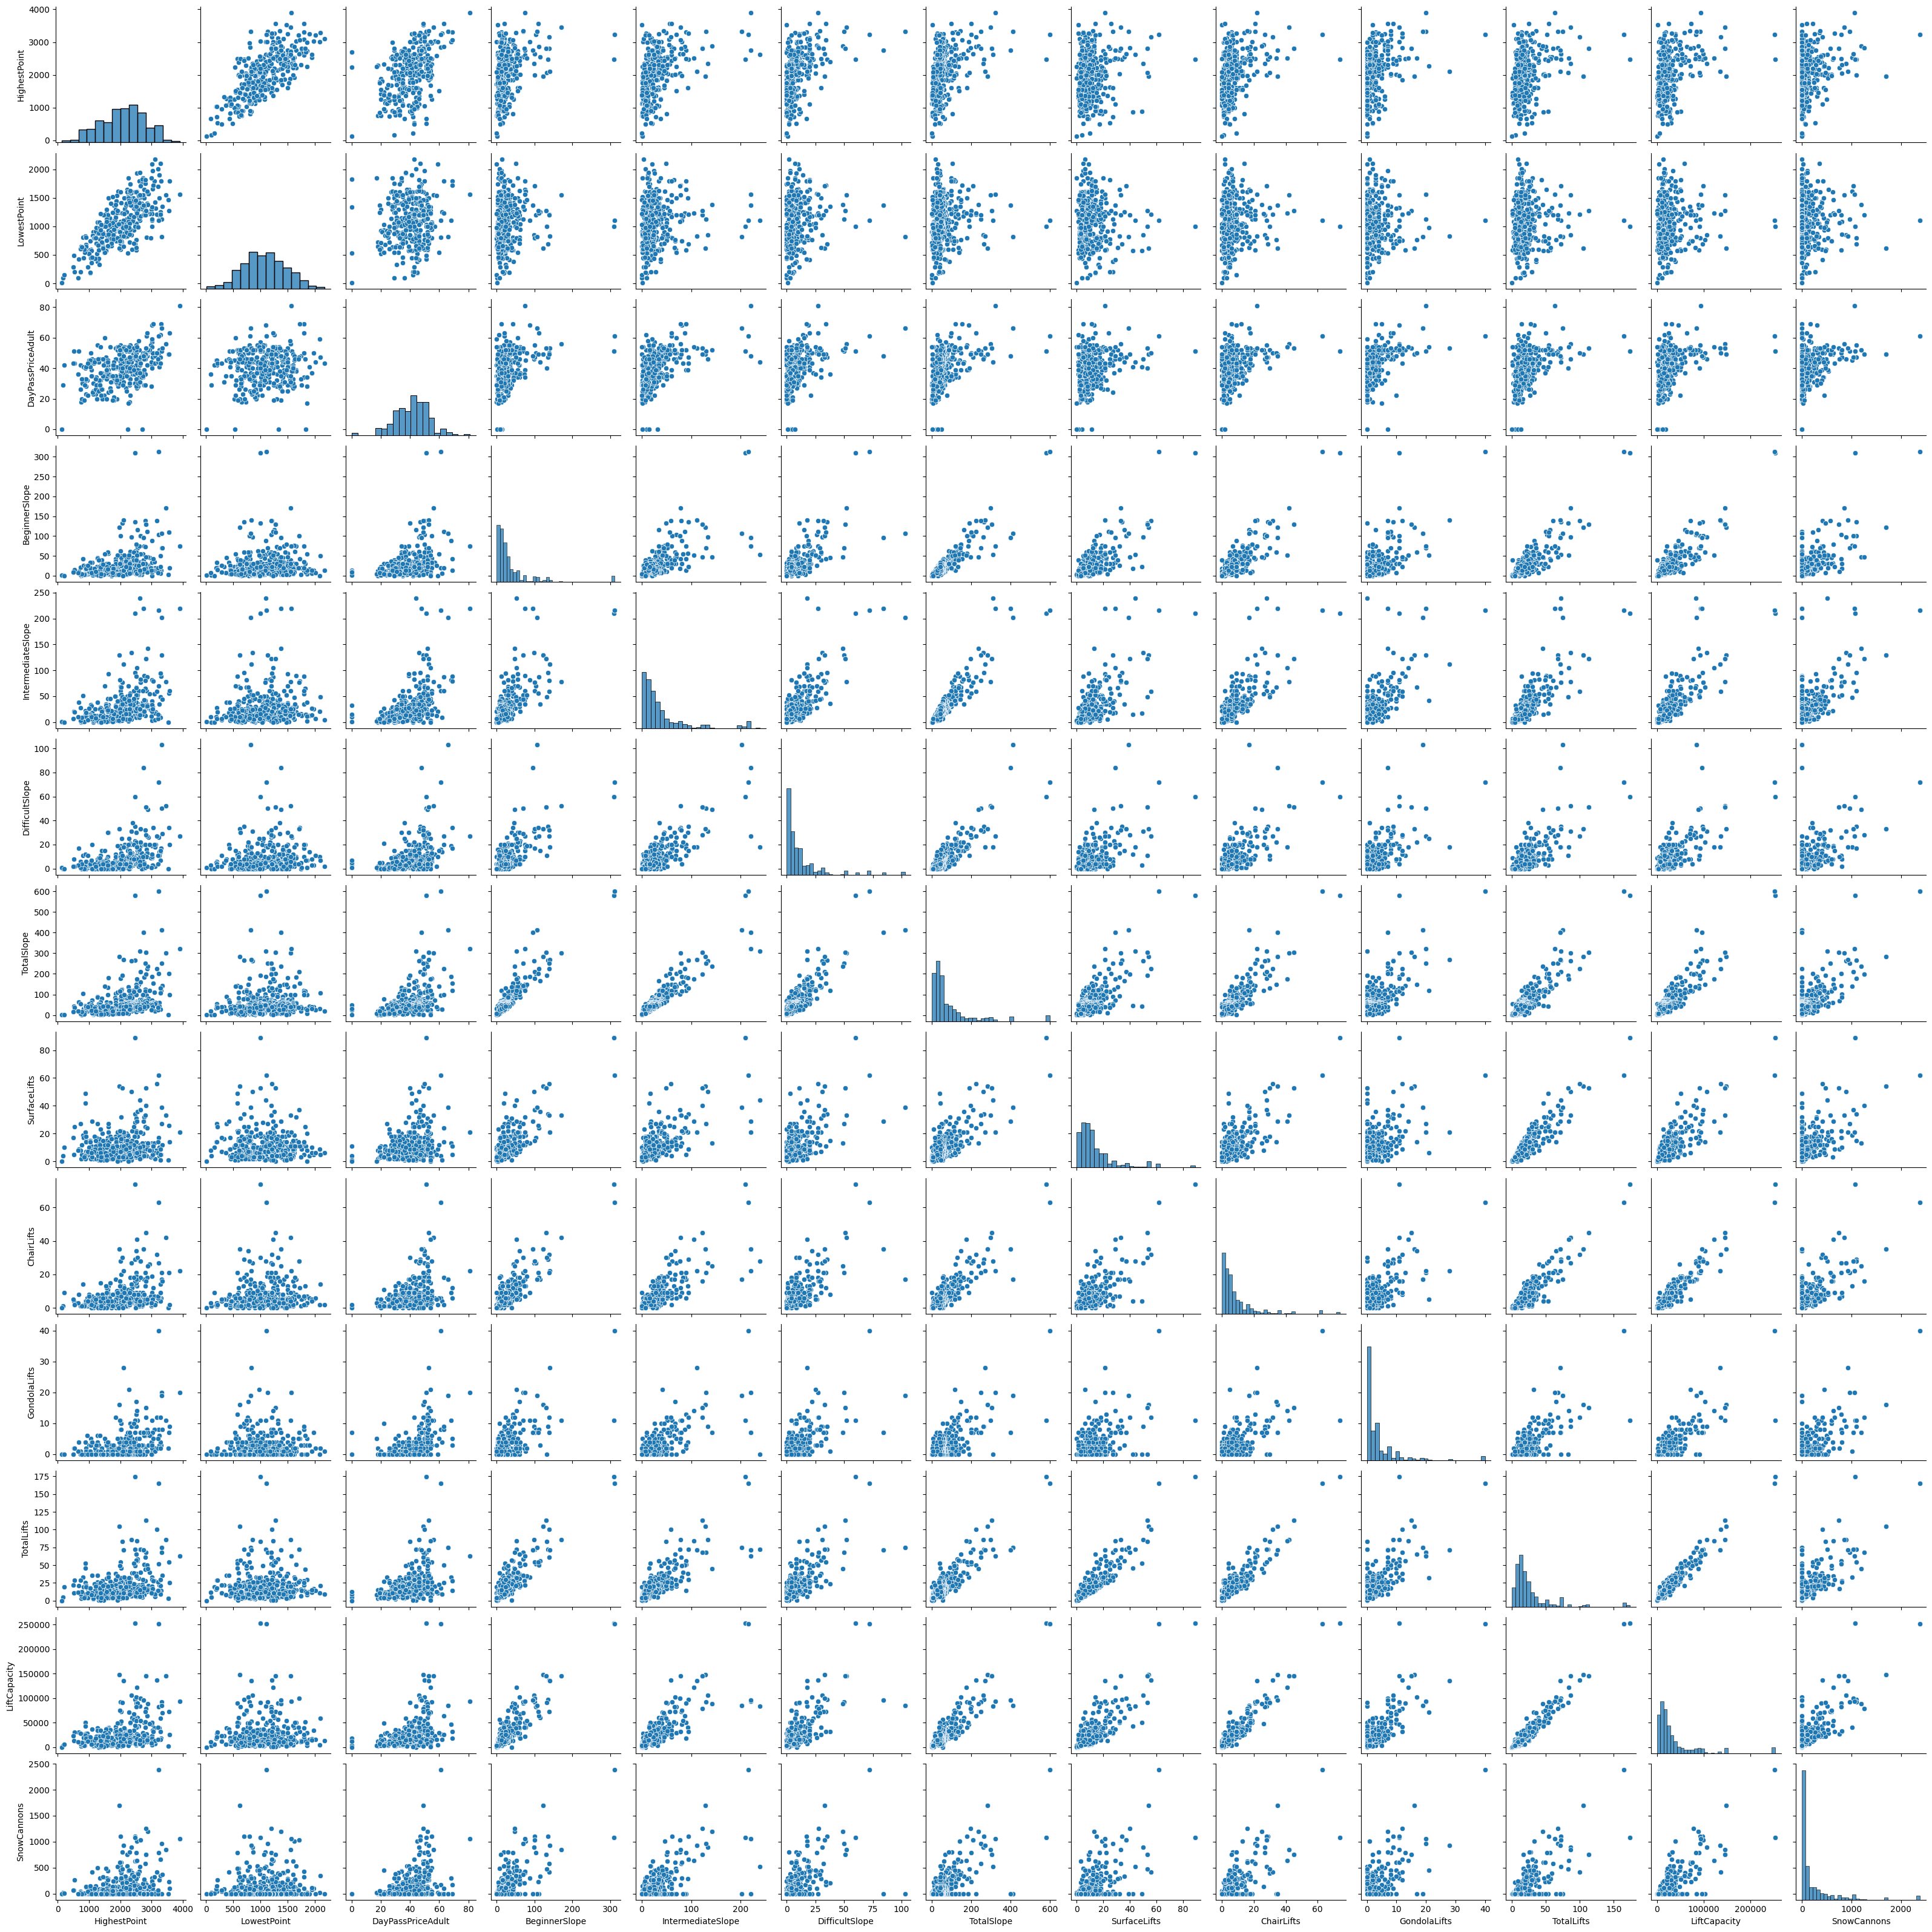

In [3]:
# your code
sns.pairplot(df_v)
plt.show()

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

In [4]:
# your code
corr_matrix = df_v.corr()
corr_matrix

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
HighestPoint,1.000000,0.690855,0.474562,0.395598,0.493116,0.486473,0.477986,0.258042,0.396413,0.433478,0.373200,0.387280,0.326838
LowestPoint,0.690855,1.000000,0.101909,0.068579,0.094242,0.104290,0.089805,-0.036061,0.076360,-0.012420,0.011693,0.020114,0.032361
DayPassPriceAdult,0.474562,0.101909,1.000000,0.424408,0.549071,0.489344,0.516814,0.367417,0.436581,0.544883,0.463984,0.469859,0.397795
BeginnerSlope,0.395598,0.068579,0.424408,1.000000,0.799331,0.763475,0.941041,0.850545,0.921099,0.784923,0.936289,0.943078,0.801610
IntermediateSlope,0.493116,0.094242,0.549071,0.799331,1.000000,0.870134,0.950400,0.766058,0.830683,0.773212,0.857821,0.848001,0.687927
DifficultSlope,0.486473,0.104290,0.489344,0.763475,0.870134,1.000000,0.897094,0.709414,0.746290,0.710883,0.783950,0.762309,0.554865
TotalSlope,0.477986,0.089805,0.516814,0.941041,0.950400,0.897094,1.000000,0.847466,0.914837,0.819864,0.939747,0.935279,0.766030
SurfaceLifts,0.258042,-0.036061,0.367417,0.850545,0.766058,0.709414,0.847466,1.000000,0.845702,0.632735,0.942569,0.885072,0.693446
ChairLifts,0.396413,0.076360,0.436581,0.921099,0.830683,0.746290,0.914837,0.845702,1.000000,0.750504,0.958817,0.966896,0.785548
GondolaLifts,0.433478,-0.012420,0.544883,0.784923,0.773212,0.710883,0.819864,0.632735,0.750504,1.000000,0.811605,0.845237,0.798762


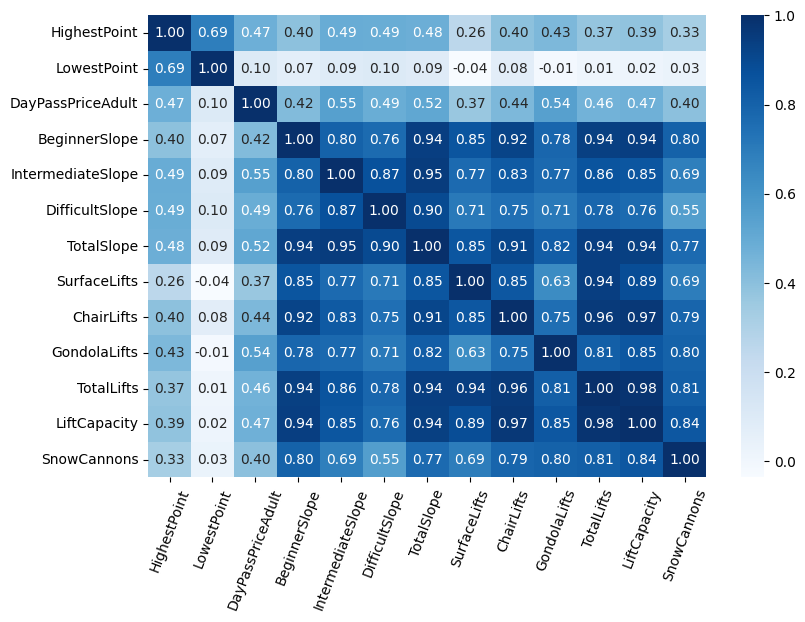

In [5]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f', ax=ax)
ax.tick_params(axis='x', labelrotation=69)
plt.show()

_Observations:_
- Almost all correlations are positive except a few pairs involving **LowestPoint**. The most correlated pair is **TotalLifts and LiftCapacity**.
- **HighestPoint, DayPassPriceAdult** and especially **LowestPoint** do not considerably affect other attributes. A notable exception is the moderate correlation between **HighestPoint and LowestPoint**. This is reflected by the scatter matrix and the correlation $0,69$.
- There exists a strong tie between **BeginnerSlope, IntermediateSlope, DifficultSlope and TotalSlope** (correlations $\geq 0,76$) as well as a minimally less strong tie between **SurfaceLifts, ChairLifts, GondolaLifts, TotalLifts and LiftCapacity** (correlations $\geq 0,63$). Among them, **IntermediateSlope** and **ChairLifts** contribute the most to **TotalSlope** and **TotalLifts/LiftCapacity**, respectively.

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

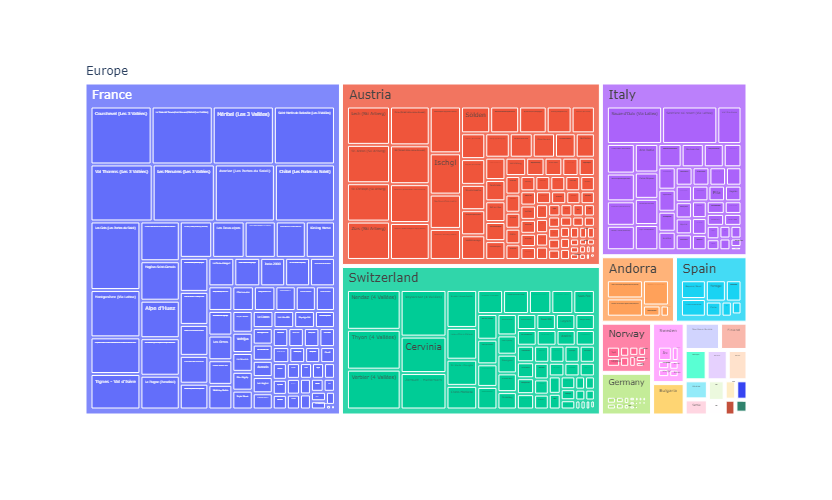

In [7]:
# your code
fig = px.treemap(df_v, path=[px.Constant('Europe'), 'Country', 'Resort'], values='TotalSlope', height=500)
fig.show()

**Your answer for...** \
*...  1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:*

| Country     | TotalSlope sum |
|-------------|----------------|
| France      | 12546          |
| Austria     | 7005           |
| Switzerland | 5710           |
| Italy       | 3742           |
| Andorra     | 723            |

*...  2. The max value of TotalSlope of the five countries you identified in 1:*

| Country     | TotalSlope max |
|-------------|----------------|
| France      | 600            |
| Austria     | 304            |
| Switzerland | 412            |
| Italy       | 400            |
| Andorra     | 210            |

These values are displayed when hovering over the tree map.

### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

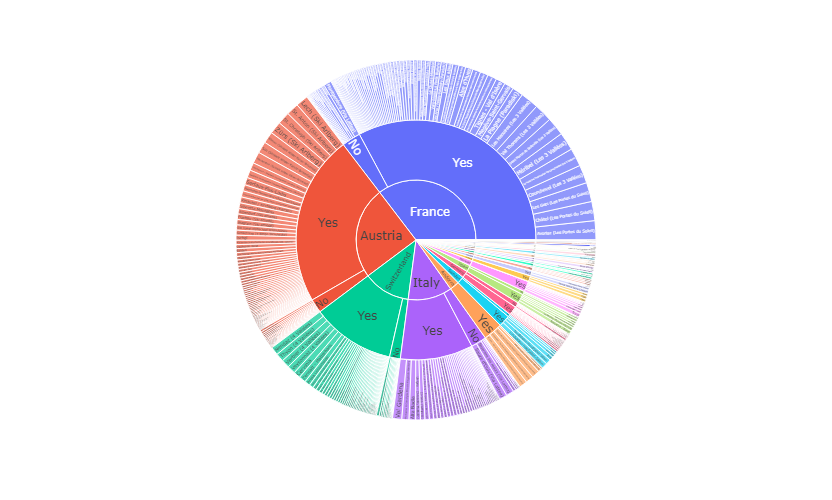

In [8]:
# your code
fig = px.sunburst(df_v, path=['Country', 'Snowparks', 'Resort'], values='TotalLifts', height=500)
fig.show()

**Your answer:**

- The top three countries that own the most lifts in their ski resorts are France, Austria and Switzerland, similar to our previous result regarding TotalSlope.
- The majority of the resorts have snowparks.
- The resorts with the highest number of lifts of 174 are situated in France.

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [ ]:
# your code

#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [ ]:
# your code

#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [ ]:
# your code

#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [ ]:
# your code

**Your answer:** 

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [ ]:
# your code

**Your answer:**

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [ ]:
# your code

#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [ ]:
# your code

**Your answer:**

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [ ]:
# your code

**Your answer:**

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [ ]:
# your code

**Your answer:**

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:**

### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [ ]:
import pandas as pd 
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [ ]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [ ]:
# your code

## Question 4: Text Mining (12 pts)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline

c:\users\thinkpad x1\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
#for sentence tokenization, word tokenization
from nltk.tokenize import sent_tokenize, word_tokenize

#for tokenization and punctuation removal 
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

#to filter out stop words
nltk.download("stopwords")
from nltk.corpus import stopwords

#for stemming
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

#for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4') # omw=open multilingual wordnet

#to compute frequency of text units
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\Thinkpad
[nltk_data]     X1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Thinkpad
[nltk_data]     X1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Thinkpad
[nltk_data]     X1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Thinkpad
[nltk_data]     X1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [4]:
# your code
friends_df = pd.read_csv('datasets/FRIENDS.csv')
friends_df.head()

,character,line
0,Monica,There's nothing to tell! He's just some guy I...
1,Joey,C'mon you're going out with the guy! There's...
2,Chandler,All right Joey be nice. So does he have a h...
3,Phoebe,Wait does he eat chalk?
4,Phoebe,Just 'cause I don't want her to go through ...


#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

<BarContainer object of 6 artists>

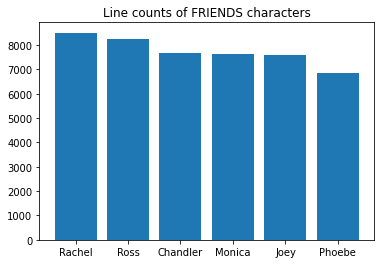

In [5]:
line_count = friends_df['character'].value_counts()
chars = line_count.keys()
lines = [line_count[char] for char in chars]
plt.plot()
plt.title('Line counts of FRIENDS characters')
plt.bar(chars, lines)

**Your answer:** Rachel and Ross have the highest line counts, which implies that they are the most talkative in the series. On the opposite site, Phoebe talks the least.

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [6]:
corpus = friends_df['line'].values
corpus

array([" There's nothing to tell! He's just some guy I work with!",
       " C'mon  you're going out with the guy! There's gotta be something wrong with him!",
       ' All right Joey  be nice.  So does he have a hump? A hump and a hairpiece?',
       ..., ' We got some time.', ' Okay  should we get some coffee?',
       ' Sure. Where?'], dtype=object)

#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [7]:
# Import needed tools
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [8]:
def my_preprocessor(sentence):
    tokenized = tokenizer.tokenize(sentence)
    filtered = [word.lower() for word in tokenized if word.lower() not in stop_list]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return ' '.join(lemmatized)

#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [9]:
corpus_p = list(map(my_preprocessor,  corpus))
corpus_p

['nothing tell guy work',
 'c mon going guy gotta something wrong',
 'right joey nice hump hump hairpiece',
 'wait eat chalk',
 'cause want go went carl oh',
 'okay everybody relax even date two people going dinner sex',
 'sound like date',
 'alright back high school standing middle cafeteria realize totally naked',
 'look realize phone',
 'instead',
 'right',
 'never dream',
 '',
 'sudden phone start ring know everybody start looking',
 'looking',
 'finally figure better answer turn mother weird never call',
 'hi',
 'guy say hello wanna kill',
 'okay sweetie',
 'feel like someone reached throat grabbed small intestine pulled mouth tied around neck',
 'cookie',
 'carol moved stuff today',
 'ohh',
 'let get coffee',
 'thanks',
 'ooh oh',
 'stop cleansing aura leave aura alone okay',
 'fine murky',
 'fine alright really everyone hope happy',
 '',
 'hell left',
 'never knew lesbian',
 'okay everyone keep fixating know know',
 'sometimes wish lesbian say loud',
 'told mom dad last night se

#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
target = friends_df['character'].tolist()
friends_train, friends_test = train_test_split(friends_df, random_state=RANDOM_SEED, test_size=0.2, stratify=target)

#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [12]:
corpus_train = friends_train['line'].tolist()
corpus_test = friends_test['line'].tolist()
corpus_train

[' Yeah.',
 ' Hold on a second  alright? Just think about what you went through the last time you quit.',
 " I think you're my favorite.",
 ' Well  alright  we already tried feeding her  changing her  burping her  oh try this one! Go back in time and listen to Phoebe!',
 ' New people.',
 " What about Emma? We don't have a nanny.",
 '  Okay! ',
 '  What do you think?',
 ' Why do you care so much anyway?',
 ' Hey.',
 ' Oh what’s the matter? Are you scared?',
 " Oh  she's still napping",
 ' Wow  Ikea... what a rich culture. Uhm  you know what? I have a friend who is a masseuse.',
 '  You have no trouble telling time now right?',
 ' Yeah. I really do.',
 " And she's just so sexy and funny and has the cutest little…",
 ' So uh  what are you in for?',
 "  Hey! I'm meeting Kathy in ten minutes! I've been looking all over for you!",
 ' Yeah  it must’ve fallen out a few blocks back. I just figured we hit a dog.',
 " Look  Chandler  I told you  never tell anyone about this dog thing. It's like R

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [13]:
sow = CountVectorizer(binary=True, preprocessor=my_preprocessor)
corpus_vectors = sow.fit(corpus)

#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [14]:
n = 69
print(f"Original sentence: {corpus[n]}")
print(f"Preprocessed sentence: {corpus_p[n]}")
print(f"Encoding computed by Set of Words method:"+ str(sow.transform([corpus_p[n]]).toarray().tolist()))

Original sentence:  What  like there's a rule or something?
Preprocessed sentence: like rule something
Encoding computed by Set of Words method:[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Your answer:** The set of words encoding is very sparse, it contains a lot of zeroes.

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [15]:
sow_train = CountVectorizer(binary=True, preprocessor=my_preprocessor)
corpus_train_vectors = sow_train.fit(corpus_train)

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
clf = SGDClassifier(loss='log_loss', n_jobs=-1, random_state=RANDOM_SEED)
clf.fit(sow_train.transform(corpus_train), friends_train['character'].tolist())

SGDClassifier(loss='log_loss', n_jobs=-1, random_state=42069)

In [18]:
train_pred = clf.predict(sow_train.transform(corpus_train))
test_pred = clf.predict(sow_train.transform(corpus_test))
train_true = friends_train['character'].tolist()
test_true = friends_test['character'].tolist()

In [19]:
from sklearn.metrics import accuracy_score
print(f"The accuracy of the classifier on the train corpus is {accuracy_score(train_true, train_pred)}")
print(f"The accuracy of the classifier on the test corpus is {accuracy_score(test_true, test_pred)}")

The accuracy of the classifier on the train corpus is 0.41923087259143804
The accuracy of the classifier on the test corpus is 0.28517682468021066


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

In [20]:
# The distribution of the line count for each character
dist = line_count/line_count.sum()
dist

Rachel      0.182870
Ross        0.177667
Chandler    0.165262
Monica      0.164488
Joey        0.162811
Phoebe      0.146902
Name: character, dtype: float64

In [21]:
random_guess_acc = dist.pow(2).sum()
print(f"The accuracy of the random guesser can be approximated as {random_guess_acc}")

The accuracy of the random guesser can be approximated as 0.1674624354660127


**Your answer:** The distribution __dist__ shown above estimate a probability p(C) that a line belongs to C, with C being a character. For each character C and a line, the random guesser guesses C with probability p(C), and the line actually is of C with probability p(C). So the accuracy of the random guesser can be estimated as $\sum_{C}p^2(C)$.

The accuracies of the classifier on both the train and test corpus are significantly higher than the random guesser accuracy, but they are still relatively low numbers (< 0.5 and < 0.3 respectively).

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [22]:
lines = [88, 15000]
for num in lines:
    print(f"___________ LINE NUMBER {num} ___________")
    print(f"Original line: {friends_df['line'][num]}")
    print(f"Speaker predicted by the classifier {clf.predict(sow_train.transform([my_preprocessor(friends_df['line'][num])]))}")
    print(f"Actual speaker: {friends_df['character'][num]}")
    print()

___________ LINE NUMBER 88 ___________
Original line:  A wandering?
Speaker predicted by the classifier ['Ross']
Actual speaker: Ross

___________ LINE NUMBER 15000 ___________
Original line:  No  that’s all right.
Speaker predicted by the classifier ['Joey']
Actual speaker: Ross



### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [25]:
# create TaggedDocument
# note how the tag of each document is some unique identifier for the document, 
# for simplicity, we set it to the doc's position in the corpus
lines = [TaggedDocument(line, [i]) for i, line in enumerate(corpus_p)]

import multiprocessing
cores = multiprocessing.cpu_count()

# determining parameters of the model   
doc2vec = Doc2Vec(vector_size=10, min_count=3, workers=cores)
# building the vocabulary    
doc2vec.build_vocab(lines)


# document embedding, create the embedding based on all documents in the corpus
doc2vec.train(corpus_iterable=lines, total_examples=doc2vec.corpus_count, epochs=100)

#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [63]:
rand_line = corpus_p[RANDOM_SEED]
print(f"Line number {RANDOM_SEED}: {friends_df['line'][RANDOM_SEED]}")
print(f"Spoken by: {friends_df['character'][RANDOM_SEED]}")
rand_line_tokens = tokenizer.tokenize(rand_line)
rand_line_embedding = doc2vec.infer_vector(rand_line_tokens)
most_similar_lines = doc2vec.dv.most_similar(positive=[rand_line_embedding])
most_sim_tag = most_similar_lines[0][0] # Tag of the most similar line
print(f"Most similar line w.r.t. the Doc2Vec model: {friends_df['line'][most_sim_tag]}")
print(f"Speaker of the most similar line: {friends_df['character'][most_sim_tag]}")

Line number 42069:  I never sucked  I actually didn't want you to know how good I was!
Spoken by: Chandler
Most similar line w.r.t. the Doc2Vec model:  It did not.
Speaker of the most similar line: Joey


**Your answer:** The lines do not belong to the same character.

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

In [64]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [83]:
def custom_preprocessor(sent):
    tokenized = tokenizer.tokenize(sent)
    lowered = [word.lower() for word in tokenized]
    return lowered

new_friends = friends_df.copy()
new_friends['line'] = new_friends['line'].apply(custom_preprocessor)
corpora = new_friends.groupby('character')['line'].apply(list).to_dict()
char = 'Chandler'
print(f"Displaying corpus of {char}")
corpora[char]

Displaying corpus of Chandler


[['all',
  'right',
  'joey',
  'be',
  'nice',
  'so',
  'does',
  'he',
  'have',
  'a',
  'hump',
  'a',
  'hump',
  'and',
  'a',
  'hairpiece'],
 ['sounds', 'like', 'a', 'date', 'to', 'me'],
 ['alright',
  'so',
  'i',
  'm',
  'back',
  'in',
  'high',
  'school',
  'i',
  'm',
  'standing',
  'in',
  'the',
  'middle',
  'of',
  'the',
  'cafeteria',
  'and',
  'i',
  'realize',
  'i',
  'am',
  'totally',
  'naked'],
 ['then',
  'i',
  'look',
  'down',
  'and',
  'i',
  'realize',
  'there',
  's',
  'a',
  'phone',
  'there'],
 ['that', 's', 'right'],
 ['all',
  'of',
  'a',
  'sudden',
  'the',
  'phone',
  'starts',
  'to',
  'ring',
  'now',
  'i',
  'don',
  't',
  'know',
  'what',
  'to',
  'do',
  'everybody',
  'starts',
  'looking',
  'at',
  'me'],
 ['finally',
  'i',
  'figure',
  'i',
  'd',
  'better',
  'answer',
  'it',
  'and',
  'it',
  'turns',
  'out',
  'it',
  's',
  'my',
  'mother',
  'which',
  'is',
  'very',
  'very',
  'weird',
  'because',
  'she',

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [84]:
trigram = dict()
for char in corpora:
    padded_tuples, vocab = padded_everygram_pipeline(3, corpora[char])
    trigram_char = MLE(3)
    trigram_char.fit(padded_tuples, vocab)
    trigram[char] = trigram_char

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [89]:
for char in trigram:
    print(f"{char}: {trigram[char].generate(10)}")

Chandler: ['something', 'tonight', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Joey: ['<s>', 'the', 'fridge', 'thanks', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Monica: ['<s>', '<s>', 'you', 'were', 'little', 'you', 'slept', 'through', 'the', 'grand']
Phoebe: ['<s>', '<s>', 'that', 'is', 'very', 'sexually', 'aggressive', '</s>', '</s>', '</s>']
Rachel: ['huge', 'life', 'altering', 'thing', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
Ross: ['of', 'those', 'going', 'on', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']


## Question 5: Process Mining (22pts)

In [1]:
import pandas as pd
import pm4py

c:\users\thinkpad x1\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\thinkpad x1\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\thinkpad x1\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from pm4py.statistics.traces.generic.log import case_statistics

In [3]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [4]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [6]:
df = pd.read_csv('datasets/reimburse.csv')
df_formatted = pm4py.format_dataframe(df, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
log = pm4py.convert_to_event_log(df_formatted)
log

[{'attributes': {'concept:name': '0'}, 'events': [{'Timestamp': Timestamp('2020-06-01 06:00:00+0000', tz='UTC'), 'CaseId': 0, 'Activity': 'Online', 'ModelTime': 0, 'Resource': '111', 'Brand': 'PEAR', 'concept:name': 'Online', 'time:timestamp': Timestamp('2020-06-01 06:00:00+0000', tz='UTC'), '@@index': 0}, '..', {'Timestamp': Timestamp('2020-06-03 09:52:18+0000', tz='UTC'), 'CaseId': 0, 'Activity': 'Pay', 'ModelTime': 186738, 'Resource': '2', 'Brand': 'PEAR', 'concept:name': 'Pay', 'time:timestamp': Timestamp('2020-06-03 09:52:18+0000', tz='UTC'), '@@index': 3}]}, '....', {'attributes': {'concept:name': '9999'}, 'events': [{'Timestamp': Timestamp('2022-02-05 20:00:11+0000', tz='UTC'), 'CaseId': 9999, 'Activity': 'Online', 'ModelTime': 53103611, 'Resource': '111', 'Brand': 'CP', 'concept:name': 'Online', 'time:timestamp': Timestamp('2022-02-05 20:00:11+0000', tz='UTC'), '@@index': 47826}, '..', {'Timestamp': Timestamp('2022-02-16 11:56:24+0000', tz='UTC'), 'CaseId': 9999, 'Activity': 'P

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [11]:
print(f"Number of events: {len(df)}")
print(f"Number of cases: {len(log)}")
print(f"Earliest timestamp: {df['Timestamp'].min()}")
print(f"Latest timestamp: {df['Timestamp'].max()}")
variants = pm4py.get_variants_as_tuples(log)
print(f"Number of trace variants: {len(variants.keys())}")

Number of events: 47830
Number of cases: 10000
Earliest timestamp: 2020-06-01 06:00:00+00:00
Latest timestamp: 2022-03-10 12:14:51+00:00
Number of trace variants: 266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

**PLEASE READ**: Because the granularity of the given log is seconds, the question is equivalent to finding events occuring at the same timestamp, resources performing activities at the same timestamp, and cases containing at least two events with same timestamp. 

In [43]:
# 1. Count the number of events occuring at each timestamp
# If timestamp T has N events, then add N-1 to the answer
# Because the "first" event happen at least 1 sec after the previous ones
# Refer to Tobias' answer here https://moodle.rwth-aachen.de/mod/forum/discuss.php?d=182470
# 'Activity' is a placeholder. Could be any column because we just count
ts_count = df.groupby('Timestamp').agg({'Activity': 'count'}).reset_index()
ts_count = ts_count[ts_count['Activity'] > 1]
ts_count['Activity'] -= 1
n_ev_same_time = ts_count['Activity'].sum()
print(f"1. There are {n_ev_same_time} events occuring almost at the same time")

# 2. For each resource, count the number of unique timestamps and the number of activities
# If num timestamps < num unique acts => that resource performs 2 activities at same time
ut_count = df.groupby('Resource').agg({'Timestamp': 'nunique', 'Activity': 'count'}).reset_index()
ut_count = ut_count[ut_count['Timestamp'] < ut_count['Activity']]
print(f"2. There are {'no' if len(ut_count)==0 else len(ut_count)} resources performing 2 activities at the same time.")

# 3. Same as 2. but aggregate by CaseID instead
cases = df.groupby('CaseId').agg({'Timestamp': 'nunique', 'Activity': 'count'}).reset_index()
cases = cases[cases['Timestamp'] < cases['Activity']]
print(f"3. There are {'no' if len(cases)==0 else len(cases)} cases with two activities executed at the same time.")

1. There are 688 events occuring almost at the same time
2. There are no resources performing 2 activities at the same time.
3. There are 21 cases with two activities executed at the same time.


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

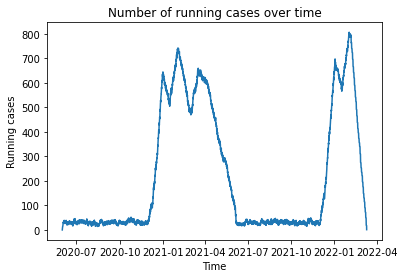

In [90]:
# Method: Select timestamps which is start or end of a case
# For each timestamp, assign a 'start' if a case starts at that timestamp
# assign a 'end' if a case ends at that timestamp
# The number of running cases at a timestamp is equal to
# #start - #end from the previous timestamps plus #start from current timestamp 
min_df = df.groupby('CaseId').agg({'Timestamp': 'min'}).reset_index()
min_df['start'] = 1
min_df['end'] = 0
max_df = df.groupby('CaseId').agg({'Timestamp': 'max'}).reset_index()
max_df['start'] = 0
max_df['end'] = 1
tsdf = pd.concat([min_df, max_df], axis=0)
chrono = tsdf.groupby('Timestamp').agg({'start': sum, 'end': sum}).reset_index().sort_values('Timestamp')
open_cases = [] # array storing num of running cases at each timestamp
prev = 0 # Store previous calculated value for efficiency
cur = chrono.iloc[0]['start'] # store current value
open_cases.append(now)
for i in range(1, len(chrono.index)):
    prev = cur
    prev_time = chrono.iloc[i-1]
    cur_time = chrono.iloc[i]
    cur += cur_time['start'] - prev_time['end']
    open_cases.append(cur)
plt.title('Number of running cases over time')
plt.xlabel('Time')
plt.ylabel('Running cases')
plt.plot(chrono['Timestamp'], open_cases)

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)* We ignored this as we don't know what this means.

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

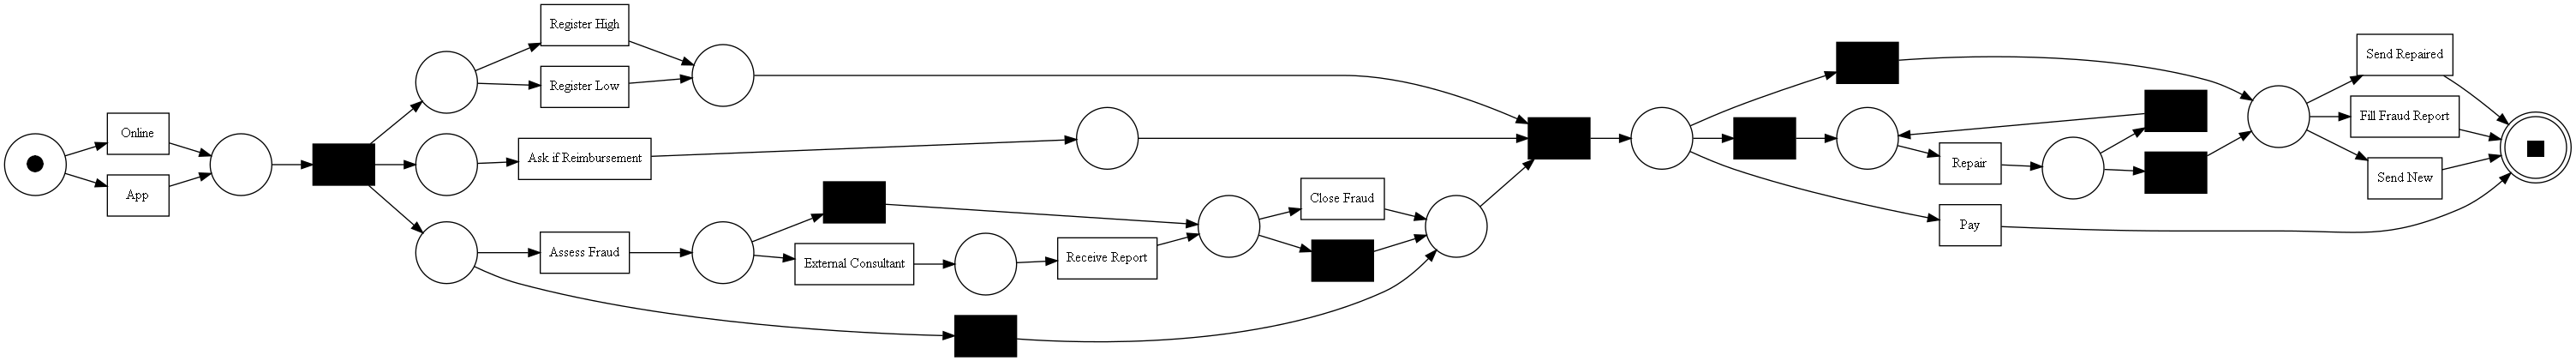

In [73]:
net, im, fm = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, im, fm, format='png') 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [115]:
def token_fitness(log, net, im, fm):
    token_replay_result =  token_based_replay.apply(log, net, im, fm)
    m = 0
    c = 0
    r = 0
    p = 0
    for trace in token_replay_result:
        m += trace['missing_tokens']
        c += trace['consumed_tokens']
        r += trace['remaining_tokens']
        p += trace['produced_tokens']
    fitness = 0.5*(1-m/c)+0.5*(1-r/p)
    return fitness

In [116]:
print(f"Fitness of the discovered Petri net using token-based replay: {token_fitness(log, net, im, fm)}")

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

Fitness of the discovered Petri net using token-based replay: 1.0


#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [78]:
log_low = pm4py.filter_event_attribute_values(log, "concept:name", ["Register Low"], level="case", retain=True)
print(f"log_low contains {len(log_low)} traces.")

log_low contains 7021 traces.


#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

In [117]:
print(f"Fitness of the Petri net for log_low: {token_fitness(log_low, net_low, im_low, fm_low)}")

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

Fitness of the Petri net for log_low: 1.0


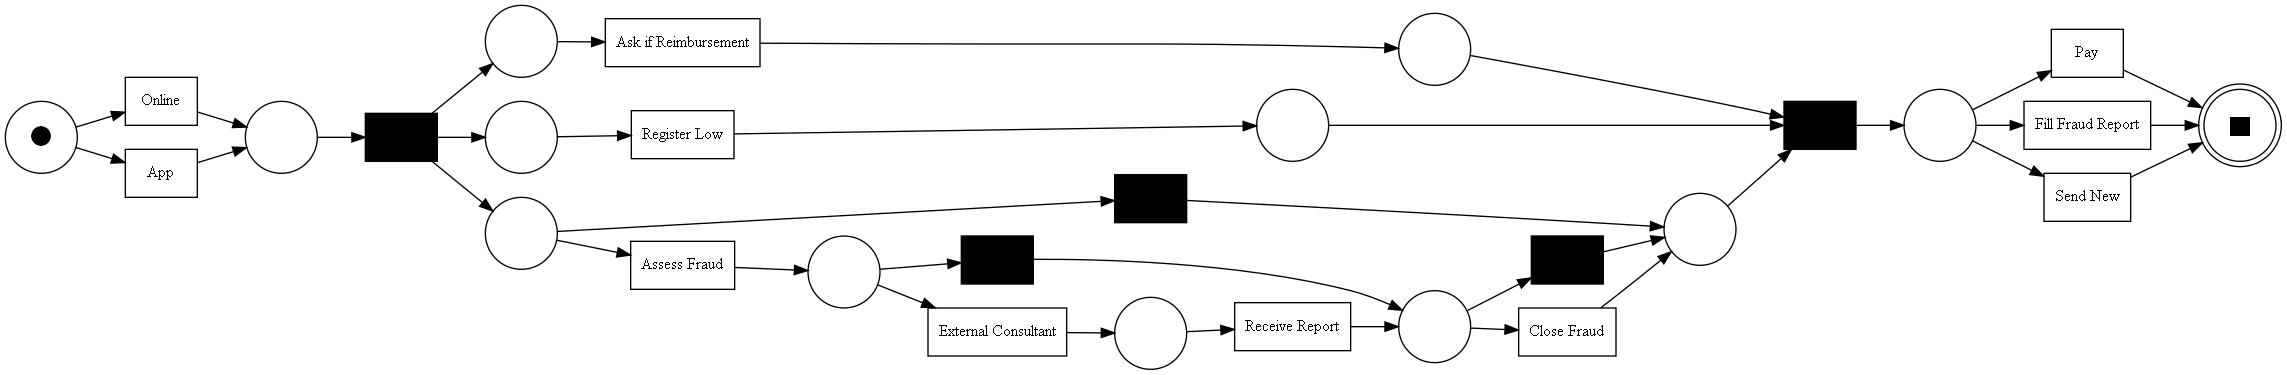

In [80]:
pm4py.view_petri_net(net_low, im_low, fm_low, format='png') 

**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*) **Register High** does not occur as an XOR choice against **Register Low** in the log_low Petri net. Moreover, the log_low net does not have **Send Repaired** as an end activity and no loop of **Repair** before the end activity.

**Your answer**: *(Relate your observations to precision here.)* Since log_low is a subset of log, the Petri net of log can replay all traces allowed by the net of log_low, plus traces not appearing in log_low. This would lead to the net of log_low having a higher precision.

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



In [82]:
log_conf = pm4py.read_xes('datasets/log_conf.xes')
log_conf

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

[{'attributes': {'concept:name': '0'}, 'events': [{'Timestamp': datetime.datetime(2020, 6, 1, 6, 0, tzinfo=datetime.timezone.utc), 'CaseId': 0, 'Activity': 'Online', 'ModelTime': 0, 'Resource': '111', 'Brand': 'PEAR', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2020, 6, 1, 6, 0, tzinfo=datetime.timezone.utc), '@@index': 0}, '..', {'Timestamp': datetime.datetime(2020, 6, 3, 9, 52, 18, tzinfo=datetime.timezone.utc), 'CaseId': 0, 'Activity': 'Pay', 'ModelTime': 186738, 'Resource': '2', 'Brand': 'PEAR', 'concept:name': 'Finalize', 'time:timestamp': datetime.datetime(2020, 6, 3, 9, 52, 18, tzinfo=datetime.timezone.utc), '@@index': 3}]}, '....', {'attributes': {'concept:name': '9999'}, 'events': [{'Timestamp': datetime.datetime(2022, 2, 5, 20, 0, 11, tzinfo=datetime.timezone.utc), 'CaseId': 9999, 'Activity': 'Online', 'ModelTime': 53103611, 'Resource': '111', 'Brand': 'CP', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2022, 2, 5, 20, 0, 11, tzinfo=datetime.

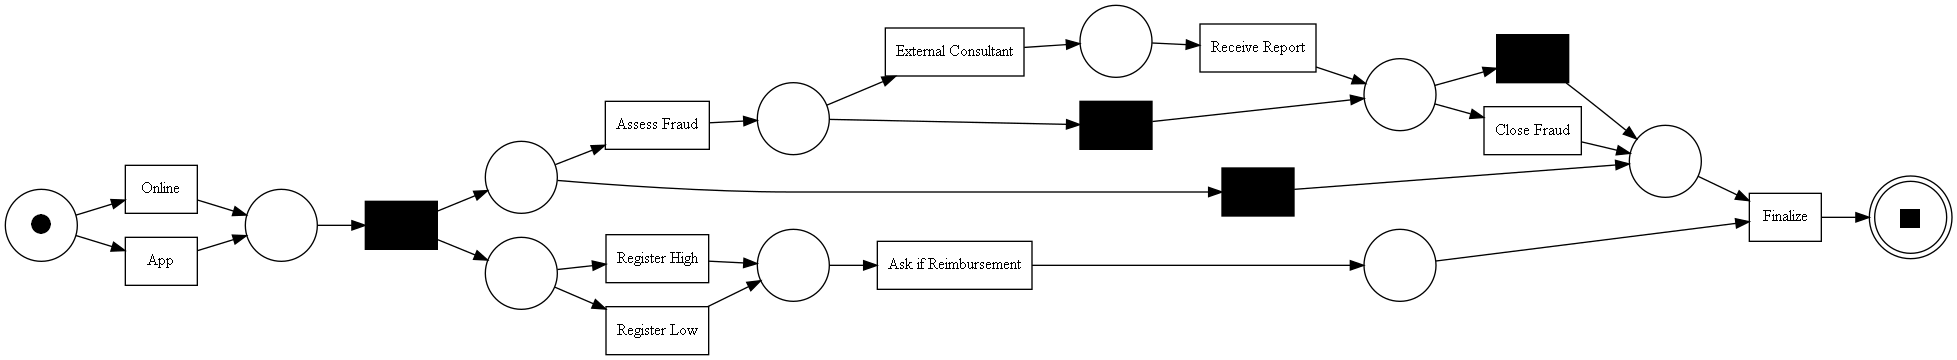

In [84]:
net_conf, im_conf, fm_conf = pm4py.read_pnml('datasets/pn_conf.apnml')
pm4py.view_petri_net(net_conf, im_conf, fm_conf, format='png') 

In [118]:
print(f"Fitness of the Petri net pn_conf for log_conf: {token_fitness(log_conf, net_conf, im_conf, fm_conf)}")

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

Fitness of the Petri net pn_conf for log_conf: 0.9892890758104679


#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [87]:
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = \
token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

replaying log with TBR, completed variants ::   0%|          | 0/10000 [00:00<?, ?it/s]

In [135]:
# For the love of gods, please make it easy to somehow access the place_fitness when knowing a place name
# Or at least add some kind of indicator that the key is a Place object
# It is annoying to see 'n1' as a key and then place_fitness['n1'] does not work at all
# We don't know how the internal hash of the PetriNet.Place object works
data = {
    'place': [p for p in place_fitness.keys()],
    'missing': [place_fitness[p]['m'] for p in place_fitness.keys()],
    'consumed': [place_fitness[p]['c'] for p in place_fitness.keys()],
    'remaining': [place_fitness[p]['r'] for p in place_fitness.keys()],
    'produced': [place_fitness[p]['p'] for p in place_fitness.keys()]
}
token_rep_df = pd.DataFrame(data=data)
token_rep_df

,place,missing,consumed,remaining,produced
0,n1,899,10000,899,10000
1,n2,0,10000,0,10000
2,n4,0,1917,0,1917
3,n5,0,10000,0,10000
4,n3,0,99,0,99
5,n6,0,10000,0,10000
6,n7,0,10000,0,10000
7,n8,0,10000,0,10000
8,n9,0,1917,0,1917
9,n10,0,10000,0,10000


#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [147]:
n1 = data['place'][0] # Hard code this place to access its fitness
# Displaying an unfitting trace
# We actually have investiagted many more unfitting traces ( ͡° ͜ʖ ͡°)
display(list(place_fitness[n1]['underfed_traces'])[0][:])
display(list(place_fitness[n1]['underfed_traces'])[4][:])

[{'Timestamp': datetime.datetime(2021, 12, 6, 21, 9, 55, tzinfo=datetime.timezone.utc), 'CaseId': 8197, 'Activity': 'Online', 'ModelTime': 47837395, 'Resource': '111', 'Brand': 'PEAR', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2021, 12, 6, 21, 9, 55, tzinfo=datetime.timezone.utc), '@@index': 38279},
 {'Timestamp': datetime.datetime(2021, 12, 7, 9, 23, tzinfo=datetime.timezone.utc), 'CaseId': 8197, 'Activity': 'Ask if Reimbursement', 'ModelTime': 47881380, 'Resource': '2', 'Brand': 'PEAR', 'concept:name': 'Ask if Reimbursement', 'time:timestamp': datetime.datetime(2021, 12, 7, 9, 23, tzinfo=datetime.timezone.utc), '@@index': 38280},
 {'Timestamp': datetime.datetime(2021, 12, 7, 9, 50, 54, tzinfo=datetime.timezone.utc), 'CaseId': 8197, 'Activity': 'Register Low', 'ModelTime': 47883054, 'Resource': '1', 'Brand': 'PEAR', 'concept:name': 'Register Low', 'time:timestamp': datetime.datetime(2021, 12, 7, 9, 50, 54, tzinfo=datetime.timezone.utc), '@@index': 38281},
 {'Timest

[{'Timestamp': datetime.datetime(2020, 12, 7, 15, 37, 4, tzinfo=datetime.timezone.utc), 'CaseId': 2368, 'Activity': 'Online', 'ModelTime': 16367824, 'Resource': '111', 'Brand': 'CP', 'concept:name': 'Online', 'time:timestamp': datetime.datetime(2020, 12, 7, 15, 37, 4, tzinfo=datetime.timezone.utc), '@@index': 7269},
 {'Timestamp': datetime.datetime(2020, 12, 8, 9, 7, 38, tzinfo=datetime.timezone.utc), 'CaseId': 2368, 'Activity': 'Ask if Reimbursement', 'ModelTime': 16430858, 'Resource': '1', 'Brand': 'CP', 'concept:name': 'Ask if Reimbursement', 'time:timestamp': datetime.datetime(2020, 12, 8, 9, 7, 38, tzinfo=datetime.timezone.utc), '@@index': 7270},
 {'Timestamp': datetime.datetime(2020, 12, 8, 9, 47, 45, tzinfo=datetime.timezone.utc), 'CaseId': 2368, 'Activity': 'Register Low', 'ModelTime': 16433265, 'Resource': '1', 'Brand': 'CP', 'concept:name': 'Register Low', 'time:timestamp': datetime.datetime(2020, 12, 8, 9, 47, 45, tzinfo=datetime.timezone.utc), '@@index': 7271},
 {'Timestamp

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)* In the investigated unfitting traces, the activity **Ask if Reimbursement** occurs before either **Register Low** or **Register High**. In the provided Petri net, it is the other way around. 

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*) We can see from the table that n1 is the place with missing and remaining tokens. Based on the apnml file, n1 is the only post place of **Register Low** or **Register High** and the only pre place of **Ask if Reimbursement**. Based on the deviations above, we observe that during the token replays of the unfitting traces, **Ask if Reimbursement** must be fired first, but due to **Register Low/High** not being fired yet, a missing token is placed on n1. And then one of **Register Low/High** is fired, which places a token on n1. This token is never consumed afterwards, as **Ask if Reimbursement** is never fired more than once, and thus becomes a remaining token. This observation is also consistent with the fact that the number of missing and remaining tokens in n1 are equal (both are equal to 899).

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


<BarContainer object of 3 artists>

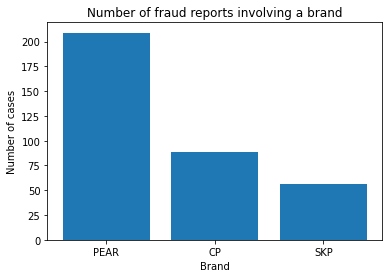

In [160]:
log_fraud = pm4py.filter_event_attribute_values(log, "concept:name", ["Fill Fraud Report"], level="case", retain=True)
fraud_df = pm4py.convert_to_dataframe(log_fraud)
brands = fraud_df.groupby('CaseId')['Brand'].first().reset_index()
brand_count = brands['Brand'].value_counts()
plt.title('Number of fraud reports involving a brand')
plt.xlabel('Brand')
plt.ylabel('Number of cases')
plt.bar(brand_count.index, brand_count)

**Your answer:** (*Describe the plot in two to three sentences.*) The plot shows the brand PEAR are involved in many more fraud reports than the other two brands. It might give the false impression that PEAR is more likely to be involved in fraud.

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


<BarContainer object of 3 artists>

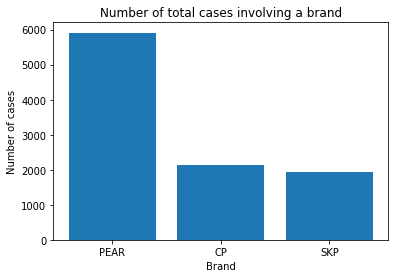

In [161]:
# Plot for clarity
brand_count_total = df.groupby('CaseId')['Brand'].first().reset_index()['Brand'].value_counts()
plt.title('Number of total cases involving a brand')
plt.xlabel('Brand')
plt.ylabel('Number of cases')
plt.bar(brand_count_total.index, brand_count_total)

In [162]:
for b in brand_count.index:
    print(f"Confidence of the association rule {b} => FRAUD is {brand_count[b]/brand_count_total[b]}")

Confidence of the association rule PEAR => FRAUD is 0.035357807477584165
Confidence of the association rule CP => FRAUD is 0.041549953314659195
Confidence of the association rule SKP => FRAUD is 0.028762198253723677


**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)* Consider the association rule BRAND => FRAUD, which means that the brand BRAND is more likely to be involved in a fraud. When calculating the confidence of these rules, it turns out that CP => FRAUD has the highest confidence, not PEAR => FRAUD. Statistically speaking, CP is actually more likely to be involved in fraud than PEAR. This is why the impression given by the plot in c(i) is actually misleading and we should not try to infer anything from it. On the other hand, all the confidences are low (< 0.05), and the ratio of cases with fraud reports are also low (354/10000), meaning customers don't have to worry too much about whether a brand is more likely to cause fraud.

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [168]:
data = pd.read_csv('datasets/berkeley.csv')
data

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [169]:
data = data.drop(['Year'], axis=1)
data

,Major,Gender,Admission
0,C,F,Rejected
1,B,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected
...,...,...,...
12758,Other,M,Accepted
12759,D,M,Accepted
12760,Other,F,Rejected
12761,Other,M,Rejected


**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [173]:
data['admitted'] = (data['Admission'] == 'Accepted').astype(int) # Convert admission to 0 and 1
data.groupby('Gender').agg({'admitted': lambda x: x.sum()/x.count()}).reset_index() # Compute admission rate by gender

,Gender,admitted
0,F,0.345753
1,M,0.442786


**Your answer:** The overall asmission rate of male is higher than female.

**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [179]:
data.groupby(['Major', 'Gender']).agg({'admitted': lambda x: x.sum()/x.count()}).reset_index() # Compute admission rate by gender and majors

,Major,Gender,admitted
0,A,F,0.824074
1,A,M,0.724956
2,B,F,0.680000
3,B,M,0.630357
4,C,F,0.338954
5,C,M,0.369231
6,D,F,0.349333
7,D,M,0.330935
8,E,F,0.239186
9,E,M,0.277487


**Your answer:** In the majors A, B, D, F, the admission rate of female is higher than male. In the majors C, E, and Other, the admission rate of male is higher than female

**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:** We can not confirm a sex bias in the admission rates.

## Question 7: Big Data (15pts)

In [1]:
import pandas as pd

c:\users\thinkpad x1\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\thinkpad x1\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\thinkpad x1\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


## **Your answer:**
1. In case of streaming data, the mean can be computed in real time by keeping the previous mean with number of seen values.
2. In case of distributed data, the mean of all data can be computed from the mean of each nodes if the number of values of each node is known.

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:** Let $Act, Lifecycle, ExecID$ be the universes of all activities (here: function calls), lifecycle transitions, and execution IDs, respectively. Because we are dealing with UNIX timestamps in this exercises, we model timestamps and timestamp differences with $\mathbb{N}$. Furthermore, let $Keys=\{\texttt{'duration'}, \texttt{'count'}\}$ be a special set of two strings used as keys.

Signatures for the first map reduce job:
<br>
$map: Act \times \mathbb{N} \times Lifecycle \times ExecID \rightarrow (ExecID \times \mathbb{N})$
<br>
$reduce: ExecID \times (\mathbb{N})^* \rightarrow (ExecID \times \mathbb{N})^*$

Signature for the second map reduce job:
<br>
$map: ExecID \times \mathbb{N} \rightarrow (Keys \times \mathbb{N})^* $
<br>
$reduce: Keys \times (\mathbb{N})^* \rightarrow (Keys \times \mathbb{N})^*$

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [ ]:
'''nasa_mapper1.py'''
'''
For each line (function, timestamp, lifecycle, execID)
Emits (execID, timestamp)
'''

import sys

for line in sys.stdin:
    line = line.strip()
    words = line.split() # Each line is function / timestamp / lifecycle / execID
    print('%s\t%s' % (words[3], words[1])) # Print execID with the timestamp
# We only need to print the timestamp, not the start/complete, because
# there would be only 2 timestamp for each activity
# their absolute difference is the exec duration 

In [ ]:
'''nasa_reducer1.py'''
'''
For each (execID, List[timestamp])
Emits (execID, absolute difference of the 2 timestamps)
'''

import sys

cur_execID = None # Storing currently read exec ID
cur_ts = [] # Storing timestamps of the exec ID
for line in sys.stdin:
    line = line.strip()
    execID, ts = line.split('\t', 1)
    try:
        ts = int(ts)
    except ValueError:
        continue
    if cur_execID == execID: # If reading the second timestamp
        cur_ts.append(ts)
    else:
        if cur_execID: # not the first execID
            print('%s\t%s' % (cur_execID, abs(cur_ts[1]-cur_ts[0]))) # print the previous execID and duration
        cur_execID = execID
        cur_ts = [ts]
if cur_execID == execID:
    print('%s\t%s' % (cur_execID, abs(cur_ts[1]-cur_ts[0])))


In [ ]:
'''nasa_mapper2.py'''
'''
For each line (execID, duration)
Emits ('duration', duration) and ('count', 1)
'''

import sys

for line in sys.stdin:
    line = line.strip()
    execID, duration = line.split("\t", 1)
    try:
        duration = int(duration)
    except ValueError:
        continue
    print('duration\t%s' % (duration,))
    print('count\t1')


In [ ]:
'''nasa_reducer2.py'''
'''
For each ('duration', list of durations)
Emits ('duration', sum of the durations)
For each ('count', list of counts), all count should be 1
Emits ('count', sum of the counts)
'''

import sys

cur_key = None # Store the current key ('duration' or 'count')
cur_sum = 0 # Store the current cumulative sum

for line in sys.stdin:
    line = line.strip()
    key, count = line.split('\t', 1)
    try:
        count = int(count)
    except ValueError:
        continue
    if cur_key == key:
        cur_sum += count
    else:
        if cur_key:
            print('%s\t%s' % (cur_key, cur_sum))
        cur_key = key
        cur_sum = count
if cur_key == key:
    print('%s\t%s' % (cur_key, cur_sum))


### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [2]:
# your matriculation number here
matr_nb = 394806

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

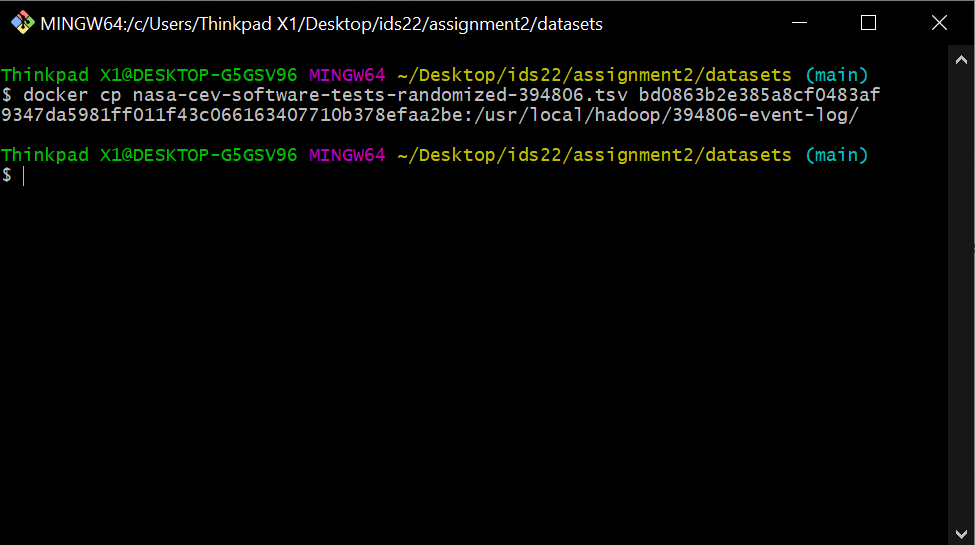

In [9]:
from IPython.display import Image
# your code
Image(filename='import_log_to_docker.png')

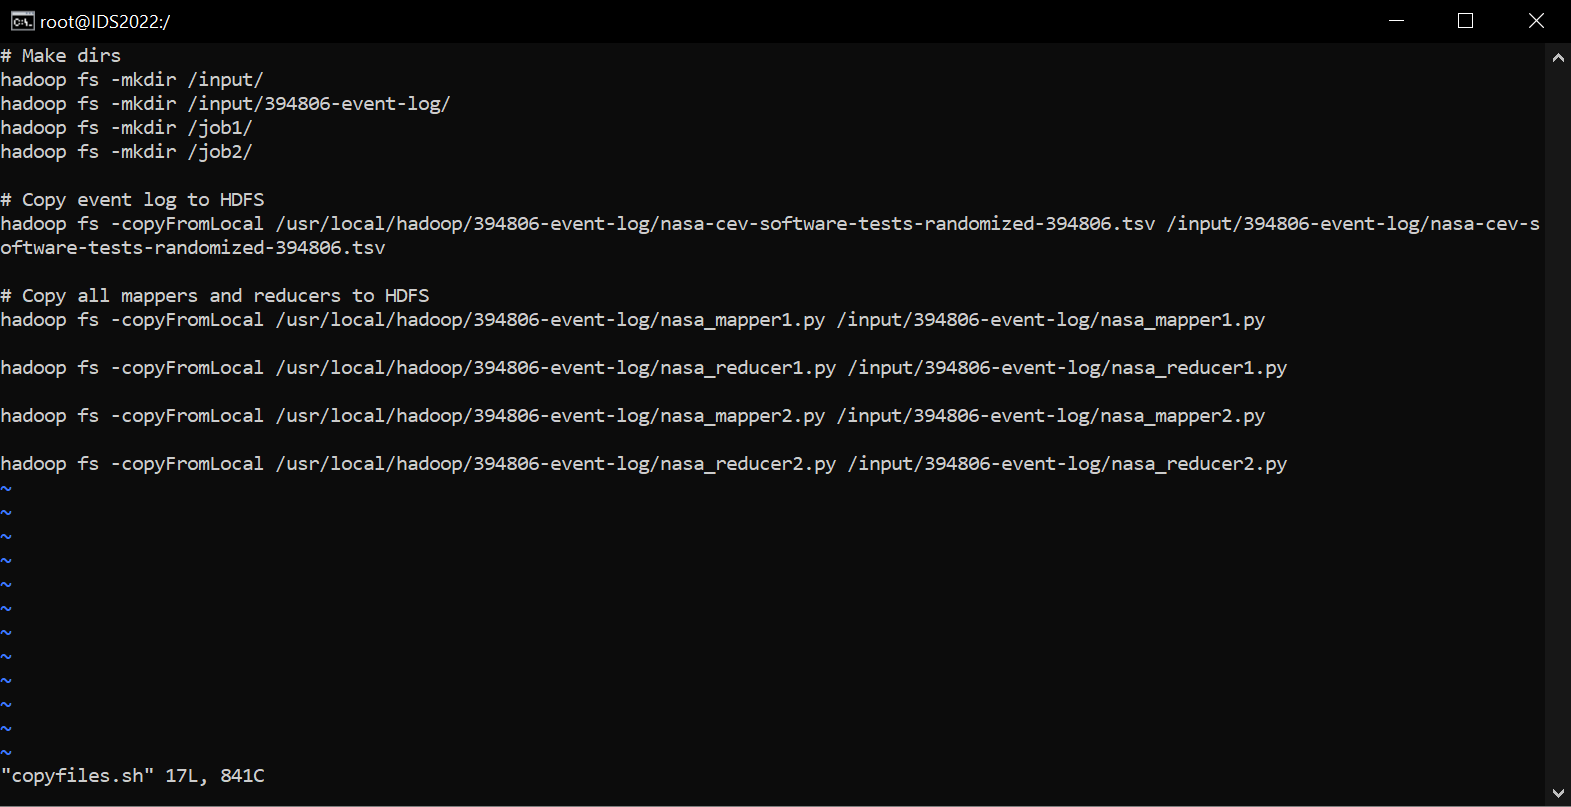

In [10]:
# your code
Image(filename='upload_file_to_hdfs.png')

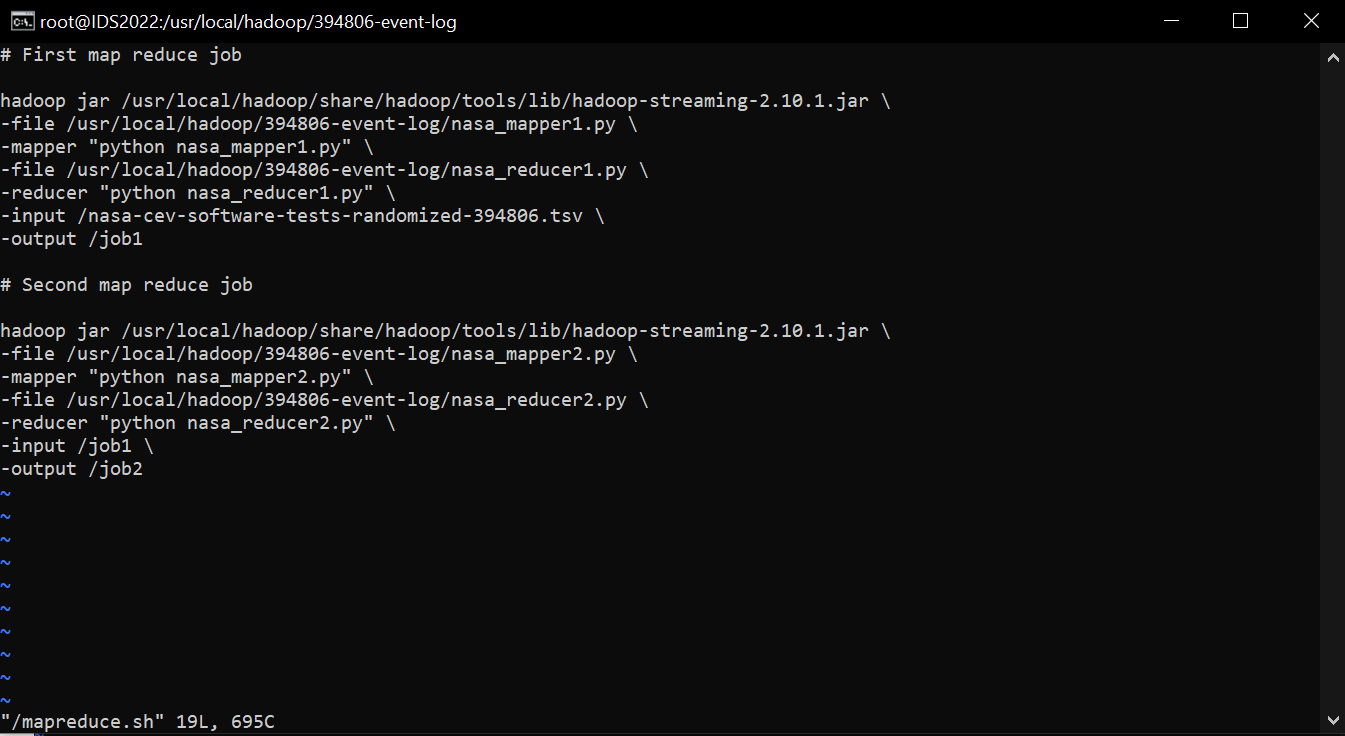

In [11]:
# your code
Image(filename='map_reduce_commands.png')

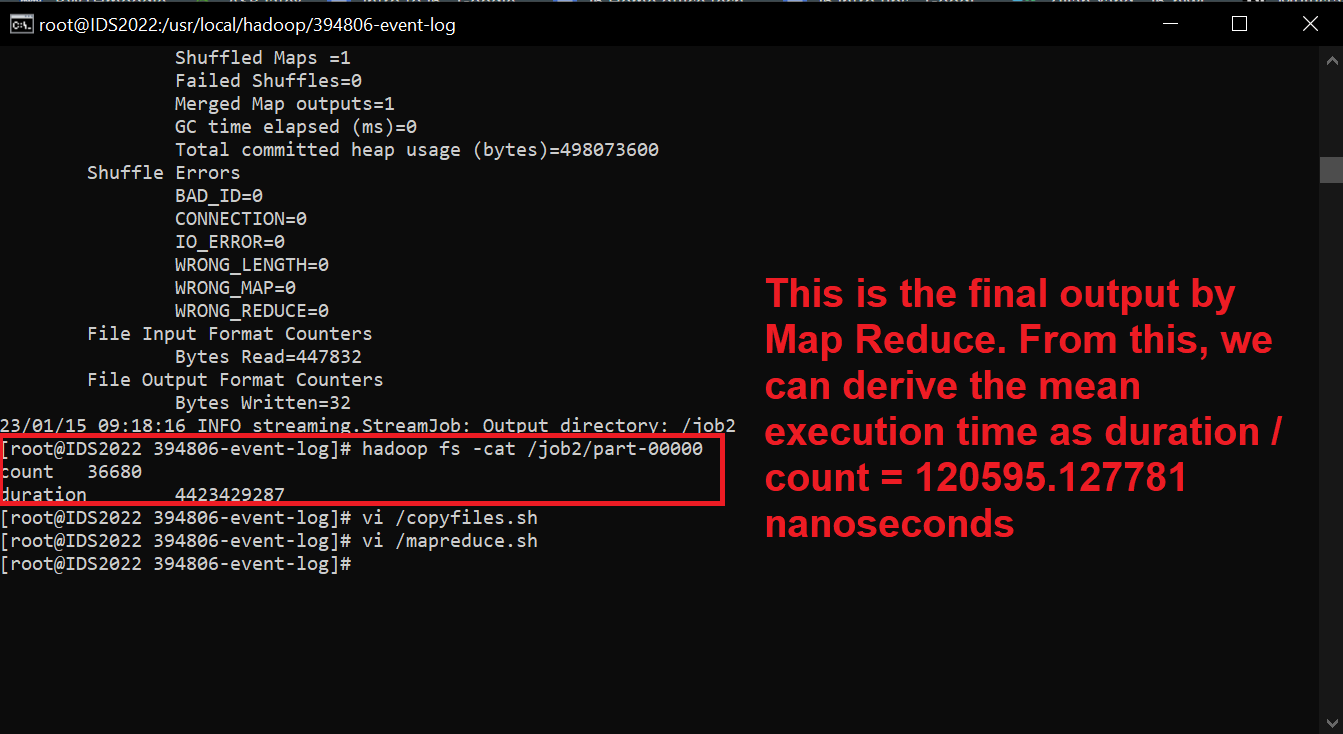

In [13]:
# your code
Image(filename='mapreduce_output.png')

In [14]:
# This cell verifies our solution.
n_ev = len(randomized_df['Execution ID'].unique()) # Number of unique executions IDs
timestamps = randomized_df.groupby('Execution ID').agg({'Timestamp': list}).reset_index()['Timestamp'] # Timestamps of all execs
durations = timestamps.apply(lambda x: abs(x[1]-x[0])) # durations of all execs
total_time = durations.sum() # Sum of all durations
print(f"Expected count of executions by hadoop: {n_ev}")
print(f"Expected sum of duration of all executions by hadoop: {total_time}")
print(f"Expected mean execution time: {total_time/n_ev}")

Expected count of executions by hadoop: 36680
Expected sum of duration of all executions by hadoop: 4423429287
Expected mean execution time: 120595.12778080699
